<a href="https://colab.research.google.com/github/mygebruikernaam/project-1/blob/master/Sutherland_Pierre_CAM_C101_W5_Mini_project_Attempt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-project 5.3 Detecting the anomalous activity of a ship’s engine

## **Business context**
You are provided with a real data set to identify anomalous activity in a ship’s engine functionality (Devabrat,  2022). As you work through this project, keep in mind that, typically speaking, anomalies would make up a minority of the data points (i.e., about 1% to 5% of the data points would be anomalies).

The data set contains six important features continuously monitored to evaluate the engine's status as ‘good’ or ‘bad’. These features are:
- **Engine rpm (revolutions per minute):** A high rpm indicates the engine is operating at a higher speed than designed for prolonged periods, which can lead to overheating, excessive wear, and eventual failure. A low rpm could signal a lack of power, issues with fuel delivery, or internal mechanical problems.
- **Lubrication oil pressure:** Low lubrication oil pressure indicates insufficient lubrication, leading to increased friction, overheating, and engine damage. A high lubrication oil pressure could signal a blockage in the oil delivery system, potentially causing seal or gasket failure.
- **Fuel pressure:** High fuel pressure can cause poor engine performance and incomplete combustion, indicating fuel pump or filter issues. A low fuel pressure may result in excessive fuel consumption, poor emissions, or damage to the fuel injectors.
- **Coolant pressure:** Low coolant pressure indicates a potential leak in the cooling system or a coolant pump failure, risking engine overheating. A high coolant pressure could be a sign of a blockage in the cooling system or a failing head gasket, which can also lead to overheating.
- **Lubrication oil temperature:** High lubrication oil temperature suggests the oil is overheating, which can degrade its lubricating properties and lead to engine damage. A low lubrication oil temperature may indicate it is not reaching its optimal operating temperature, potentially causing inadequate lubrication.
- **Coolant temperature:** High coolant temperature signals overheating, which various issues, including a failed thermostat, coolant leak, or insufficient coolant flow can cause. A low coolant temperature could suggest the engine is not reaching its optimal operating temperature, affecting performance and efficiency.

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

Your task is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. Therefore, you’ll explore the data and:
- employ preprocessing and feature engineering
- perform anomaly detection.

You must prepare a report illustrating your insights to the prospective stakeholders, explaining your approach in identifying anomalies, presenting your findings and including recommendations.

<br></br>

## **Objective**
By the end of this mini-project, you will be able to understand and apply statistical and ML methods for detecting anomalies.

In the Notebook, you will:
- explore the data set
- preprocess the data and conduct feature engineering
- apply statistical techniques to detect anomalies
- use ML algorithms to detect anomalies.

You will also write a report summarising the results of your findings and recommendations.

<br></br>

## **Assessment criteria**
By completing this project, you will be able to provide evidence that you can:
- demonstrate enhanced problem-solving skills and proposed strategic solutions by systematically analysing complex organisational challenges
- identify meaningful patterns in complex data to evidence advanced critical and statistical thinking skills
- select statistical techniques appropriate to a solutions design approach and evidence the ability to evaluate their effectiveness
- demonstrate enhanced data representation and improved model performance by systematically implementing relevant techniques
- design innovative solutions through critically selecting, evaluating and implementing effective unsupervised learning techniques.

<br></br>




### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]

# Project guidance
1. Import the required libraries and data set with the provided URL.

In [30]:
import pandas as pd

# URL to import data set from GitHub.
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'

# Create a dataframe
df = pd.read_csv(url)

# Display the first 5 rows of the dataframe
df.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220

# Project guidance
2. View the DataFrame and perform EDA, including identifying missing or duplicate values.


We'll start by having a look at the data types

In [31]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


Engine RPM is a different data type though all of these are numerical. Let's convert that to float64 as the other for more unified processing without losing accuracy.

In [32]:
df['Engine rpm'] = df['Engine rpm'].astype('float64')

In [33]:
df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
dtype: int64

No null values. Excellent

In [34]:
df.duplicated().sum()

np.int64(0)

And no duplicate values either. That's great news.

# Project guidance
3. Generate the descriptive statistics of the data, including:
 - observing the mean for each feature
 - identifying the median


In [5]:
#Using distribution stats to udnerstand the data better
df.describe()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  
count  19535.000000  19535.000000  
mean      77.643420     78.427433  
std        3.110984      6.206749  
min       71.321974     61.673325  
25%       75.725990     73.895421  
50%       76.817350     78.346662  
75%       78.071691     82.915411  
max       89.580796    195.527912

Let's just focus on mean, median and max value for each:

In [9]:
df.agg(['mean', 'median', 'max'])

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
mean     791.239263          3.303775       6.655615          2.335369   
median   746.000000          3.162035       6.201720          2.166883   
max     2239.000000          7.265566      21.138326          7.478505   

        lub oil temp  Coolant temp  
mean       77.643420     78.427433  
median     76.817350     78.346662  
max        89.580796    195.527912

#General observations for mean and median
The means and medians are very close together for all of these features however lubrication oil pressure and lubrication oil temperature seems to have a lower max possibly indicating less variation But for the other features max values are almost three times the mean and median. All of these features also seem to have potential right skew which the histograms should likely tell us a bit more about.


# Project guidance
4. Visualise the data to determine the distribution and extreme values.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

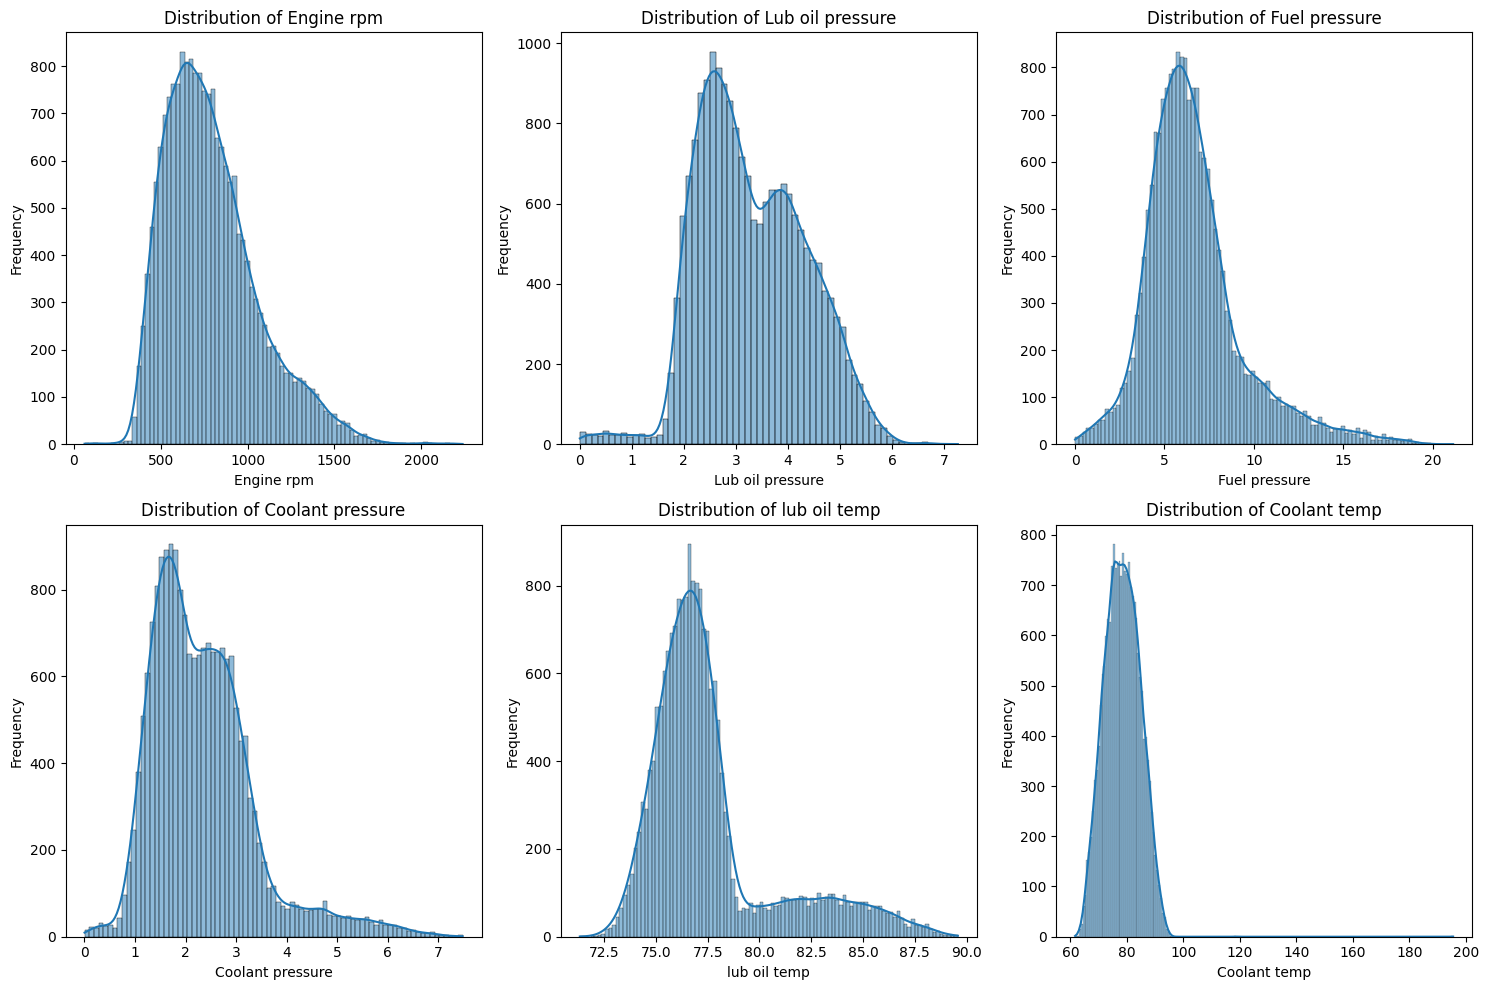

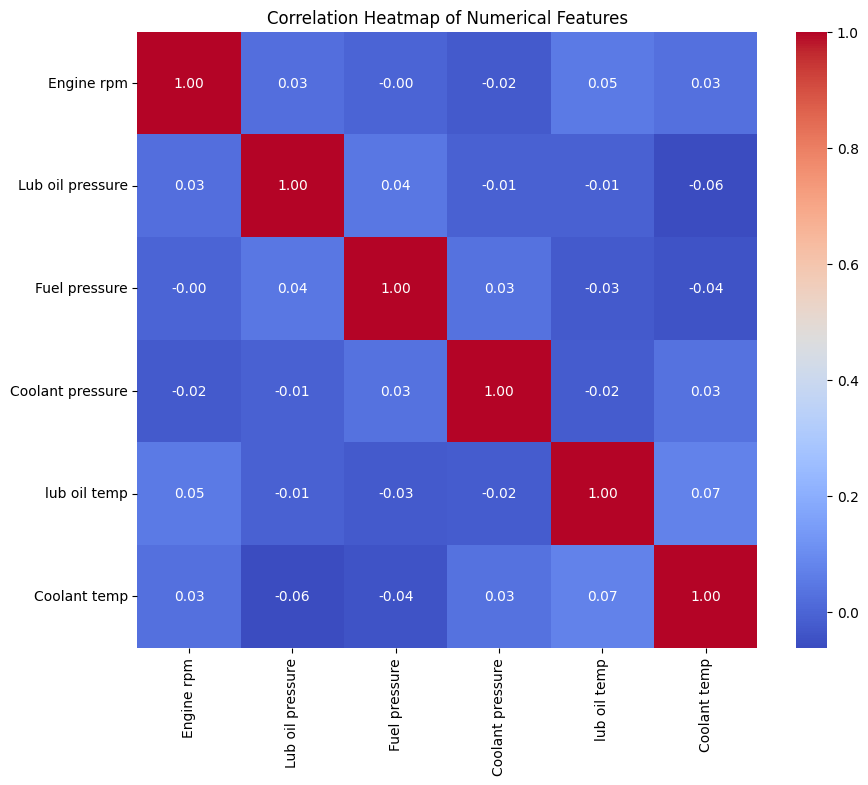

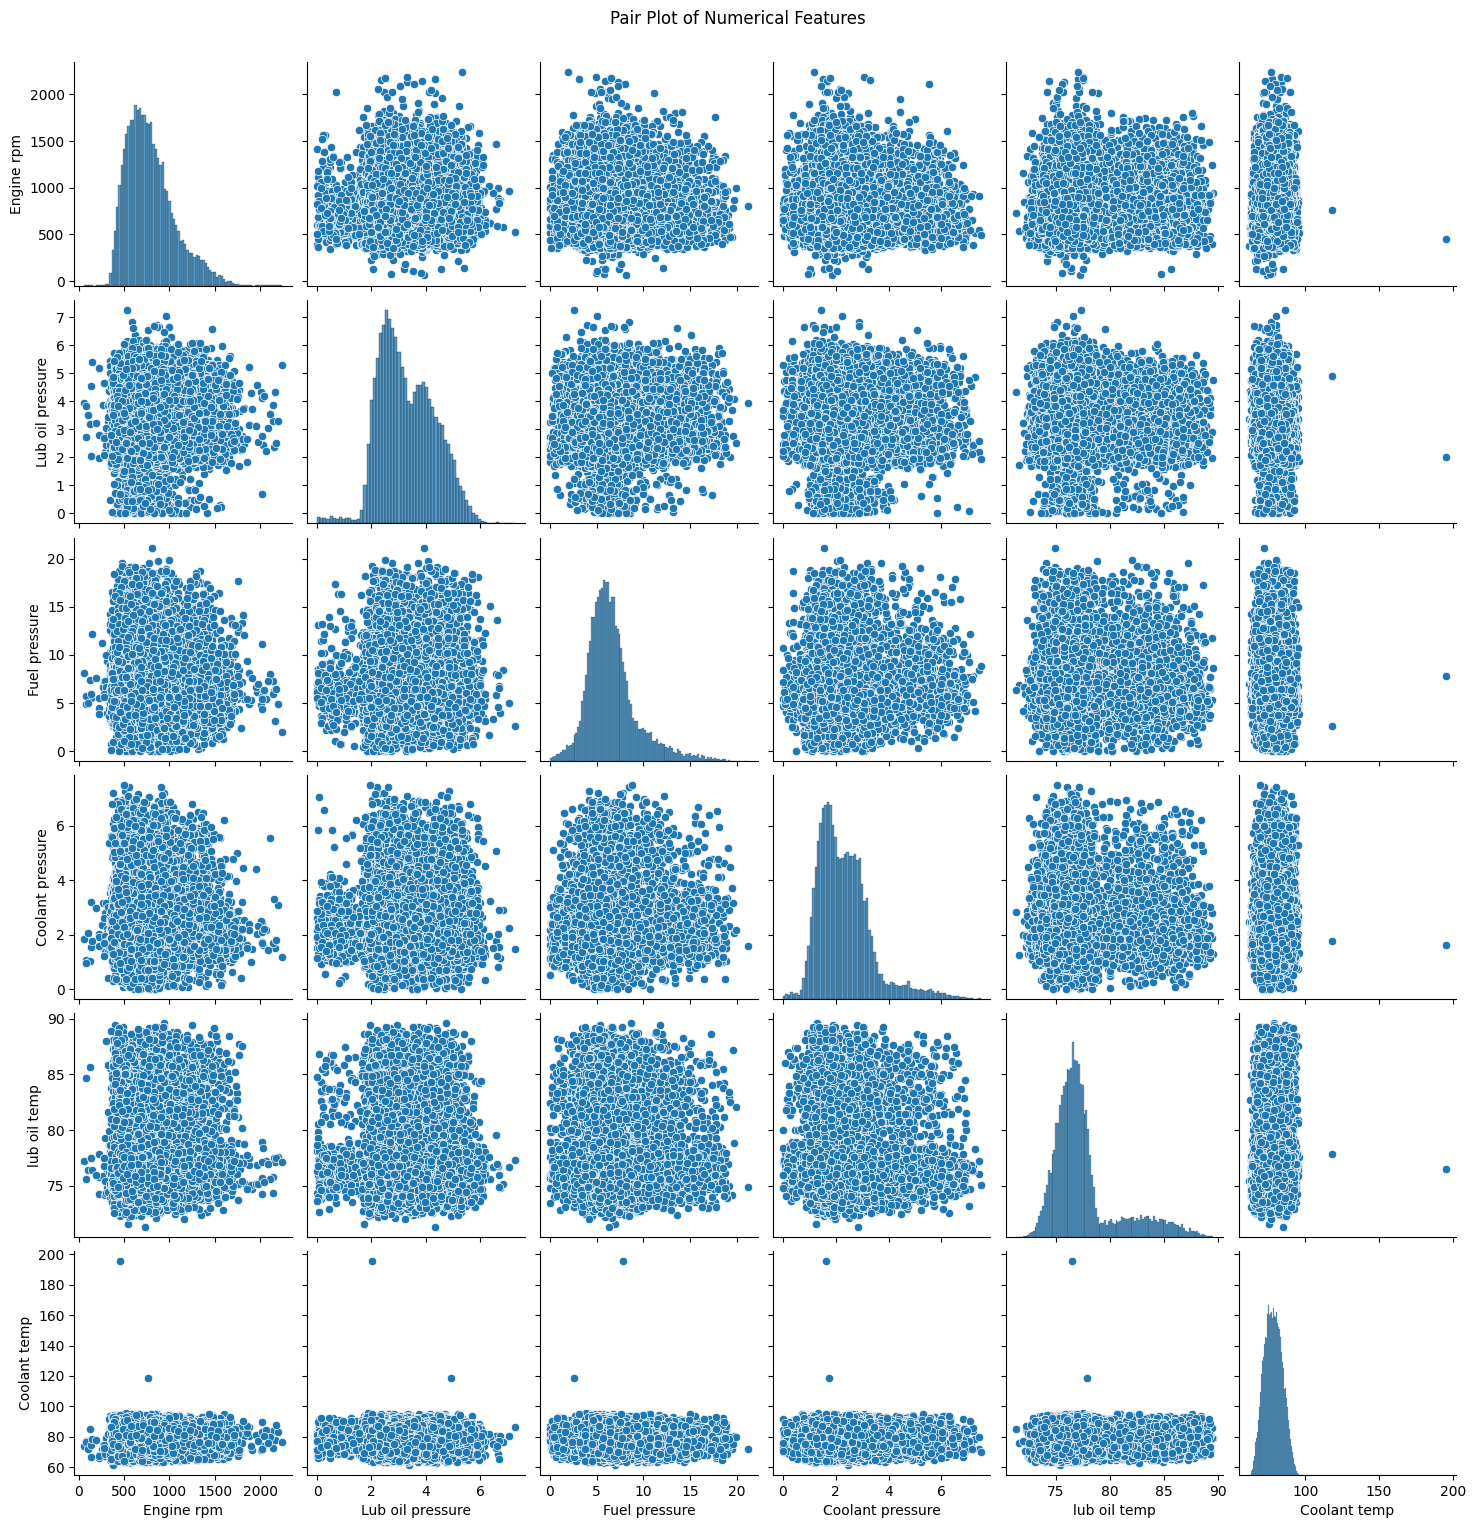

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

sns.pairplot(df)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

No correlation here by the looks of it. are the histograms is not giving you a bell curve so maybe there are different modes of operation like in the harbour and at sea maybe something like that The scatter graphs were interesting specifically for the coolant temperature it looks like two outliers or maybe sensor anomalies so a domain expert would have to advise on whether you should get rid of those or not. I think it's worth running with that assumption though if they are sensor errors we can easily put in sort of card rails just to rerun the analysis.

#Putting in some guardrails
To investigate the Coolant temp without the two extreme outliers, I'm putting in

In [20]:
display(df[df['Coolant temp'] > 100])

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
3242          760          4.908028       2.594570          1.747730   
10663         455          2.010802       7.806127          1.619575   

       lub oil temp  Coolant temp  
3242      77.873482    118.371957  
10663     76.519385    195.527912

In [39]:
#Run this is you permanently remove the two extreme outliers
#df = df[df['Coolant temp'] < 100]
df_two_out = df.copy()
df_two_out = df_two_out[df_two_out['Coolant temp'] < 100]

Now that those two anomalies are noted, let's continue.

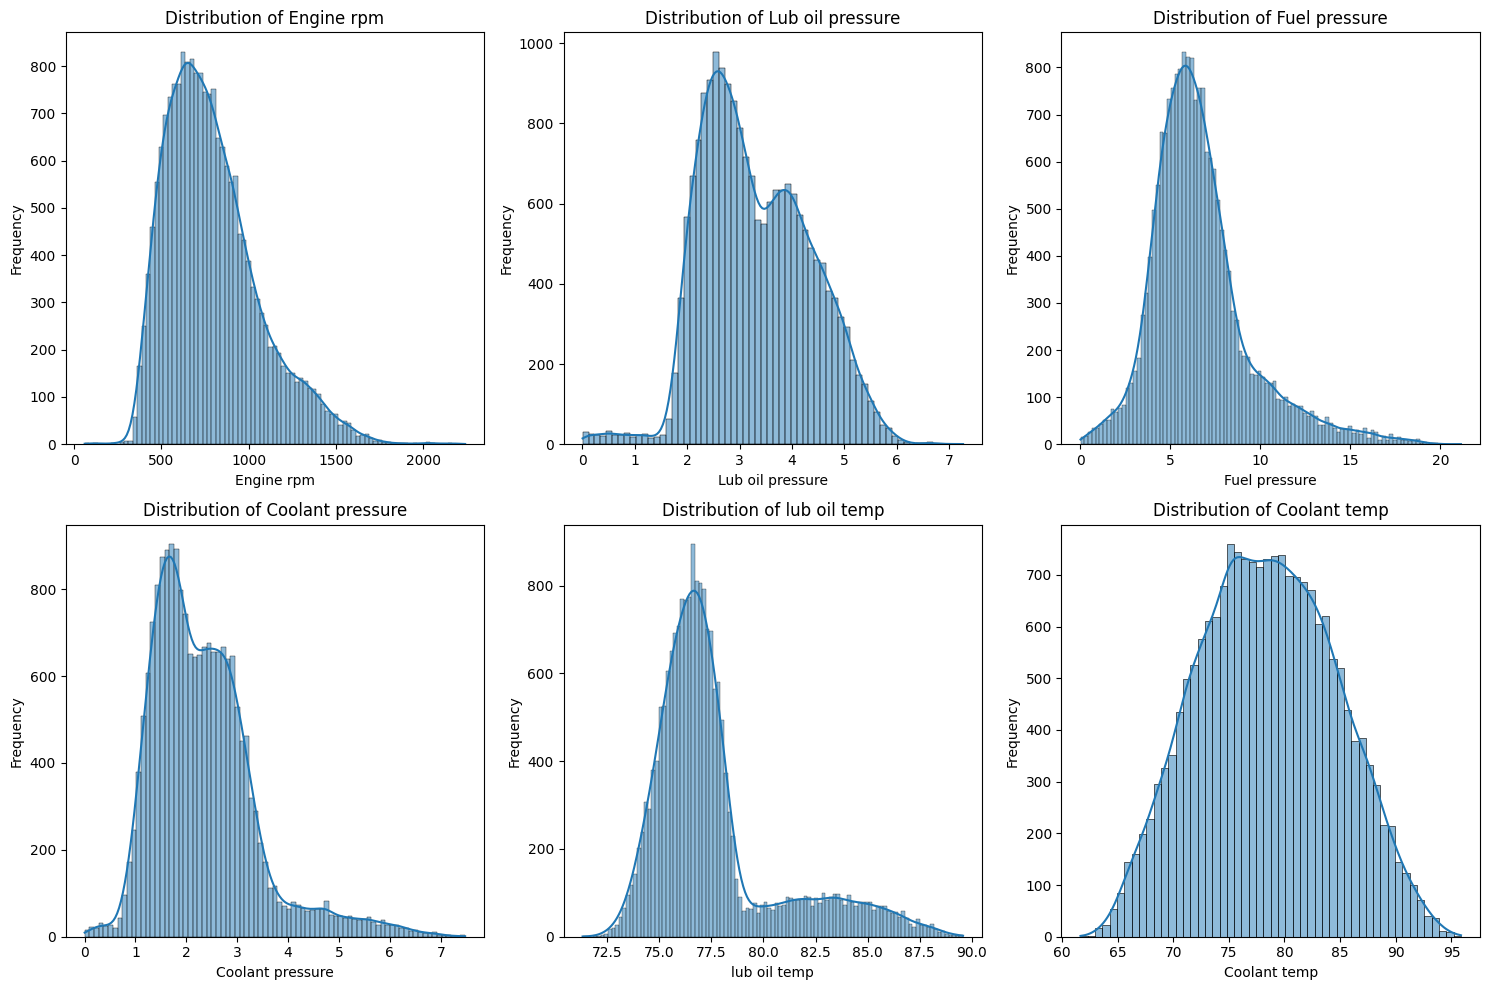

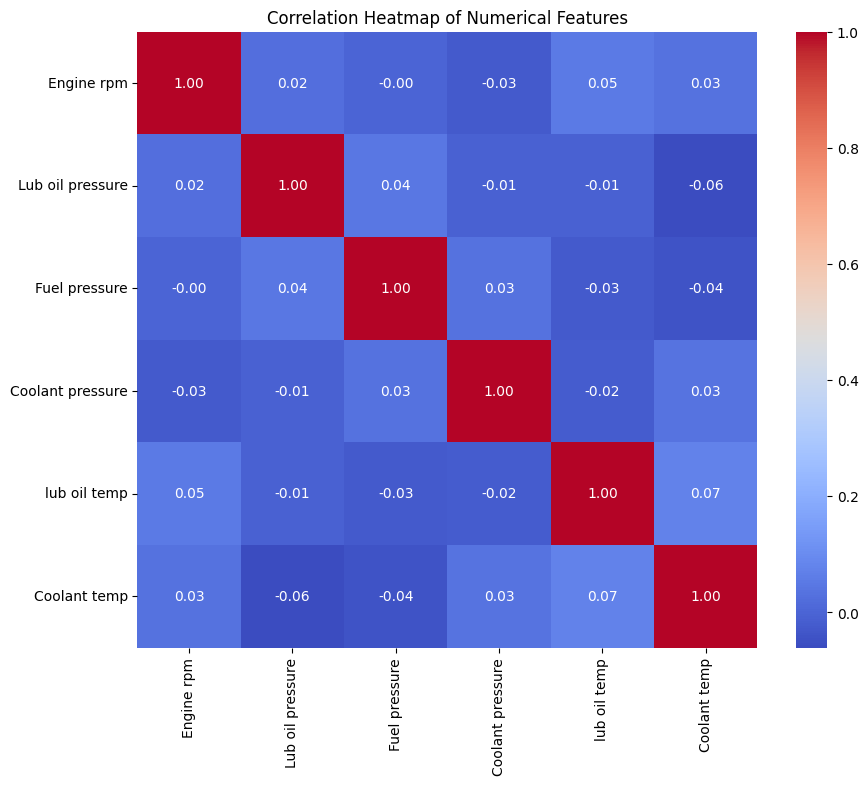

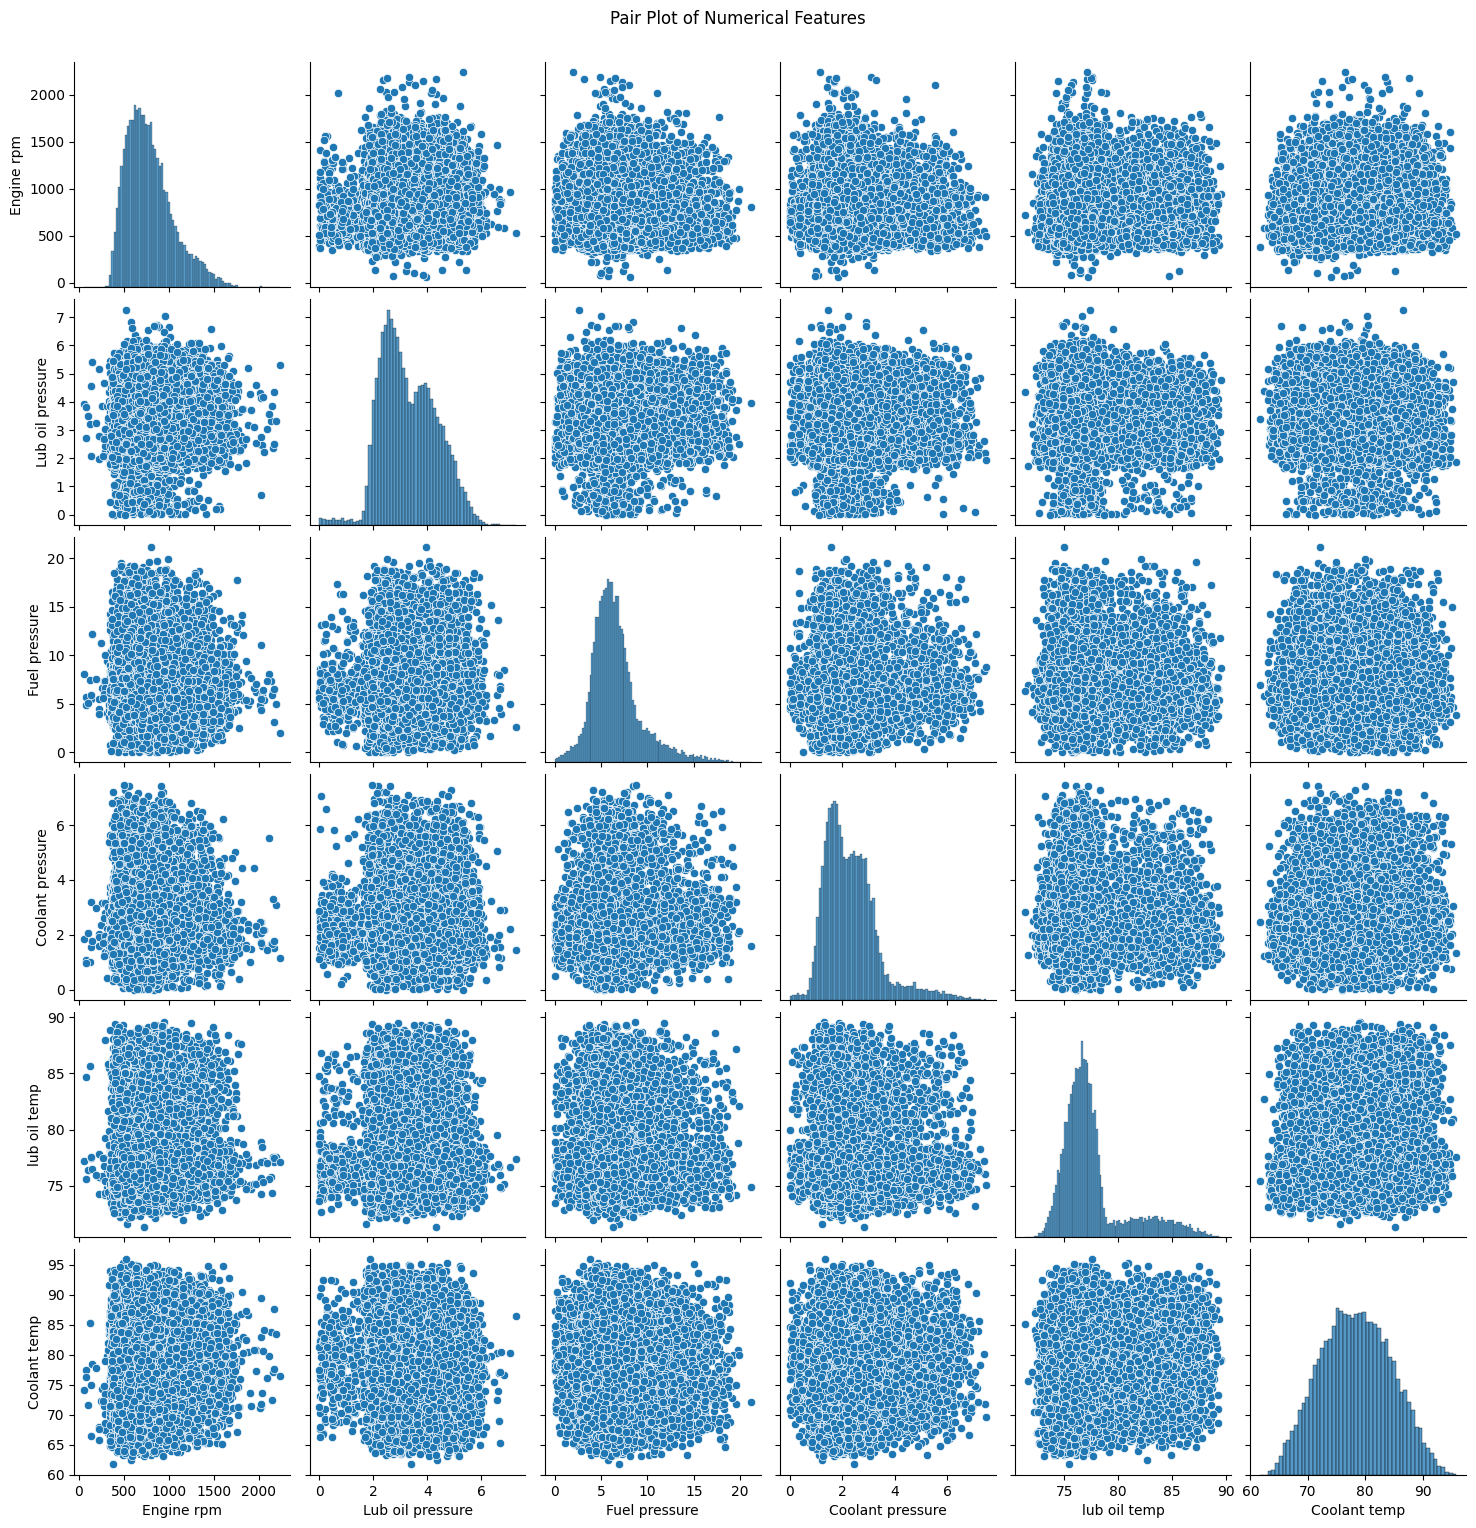

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df_two_out.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_two_out[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

correlation_matrix = df_two_out.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

sns.pairplot(df_two_out)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

Still no correlation found here even with the two extreme anomalies removed.

# Project guidance
5. Perform anomaly detection with a statistical method and identify possible anomalies. Specifically:
  - Use the interquartile range (IQR) method to identify outliers for each feature.
  - Create a new column (corresponding to each feature) that will indicate (in binary – 0,1) if the value of that feature is an outlier as per IQR calculations.
  - Use IQR to identify the number of features that must simultaneously be in outlier condition, in order for a sample to be classified as an outlier, such that the total percentage of samples identified as outliers falls within the 1-5% range.
  - Record your thoughts and observations.


In [43]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
display(IQR)

Engine rpm          341.000000
Lub oil pressure      1.536457
Fuel pressure         2.828087
Coolant pressure      1.248374
lub oil temp          2.345700
Coolant temp          9.019990
dtype: float64

Okay, this gives us the quartile lines, now we can see how many values fall outside of this.

In [44]:
outliers_count = {}
outliers_percentage = {}
total_rows = len(df)

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    outliers_count[column] = count
    outliers_percentage[column] = (count / total_rows) * 100

display(pd.DataFrame({'Outlier Count': outliers_count, 'Percentage of Total Rows': outliers_percentage}))

Outlier Count  Percentage of Total Rows
Engine rpm                  464                  2.375224
Lub oil pressure             66                  0.337855
Fuel pressure              1135                  5.810084
Coolant pressure            785                  4.018428
lub oil temp               2617                 13.396468
Coolant temp                  2                  0.010238

In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_outlier_flags = pd.DataFrame(index=df.index, columns=df.columns)

for column in df.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    df_outlier_flags[column] = (df[column] < lower_bound) | (df[column] > upper_bound)

display(df_outlier_flags.head())

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0       False             False          False             False   
1       False             False          False              True   
2       False             False          False             False   
3       False             False          False             False   
4       False             False          False             False   

   lub oil temp  Coolant temp  
0         False         False  
1         False         False  
2          True         False  
3         False         False  
4         False         False

In [50]:
outlier_counts_per_row = df_outlier_flags.sum(axis=1)
outlier_frequency = outlier_counts_per_row.value_counts().sort_index()
display(outlier_frequency)

0    14899
1     4214
2      411
3       11
Name: count, dtype: int64

In [54]:
summary_data = {
    'Exactly 1 outlier': outlier_frequency.get(1, 0),
    'Exactly 2 outliers': outlier_frequency.get(2, 0),
    'Exactly 3 outliers': outlier_frequency.get(3, 0),
    '4 or more outliers': outlier_frequency.loc[outlier_frequency.index >= 4].sum()
}

# Convert the Series to a DataFrame with a 'Count' column
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', columns=['Count'])

total_rows = len(df_outlier_flags) # Re-get total rows for clarity

# Calculate and add the 'Percentage of Total Rows' column
summary_df['Percentage of Total Rows'] = (summary_df['Count'] / total_rows) * 100

display(summary_df)

Count  Percentage of Total Rows
Exactly 1 outlier    4214                 21.571538
Exactly 2 outliers    411                  2.103916
Exactly 3 outliers     11                  0.056309
4 or more outliers      0                  0.000000

Based on this, let's go with two outliers as that puts us in the 5% zone.

In [55]:
df.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0       682.0          2.391656       4.617196          2.848982   
1       605.0          5.466877       6.424361          5.727520   
2       658.0          3.434232       3.680896          1.678708   
3       749.0          2.094656       7.120927          1.639670   
4       676.0          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220

Let's scale this dat s othat it's ready for SVM

In [59]:
from sklearn.preprocessing import StandardScaler

# Scale only the continuous numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [60]:
df_scaled.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.408212         -0.892819      -0.738304          0.495596   
1   -0.695950          2.117332      -0.083759          3.273154   
2   -0.497896          0.127697      -1.077426         -0.633625   
3   -0.157842         -1.183534       0.168533         -0.671293   
4   -0.430633          0.229492      -0.253226          0.858747   

   lub oil temp  Coolant temp  
0     -0.440709     -1.376412  
1     -1.421047     -0.567158  
2      3.358026      0.044690  
3      0.005852      0.637913  
4     -0.776966     -1.816491

# Project guidance
6. Perform anomaly detection with ML models:
  - Using one-class SVM,
    - identify possible anomalies
    - visualise the output in 2D after performing PCA and ensure the outliers are in a different colour
    - apply different combinations of parameter settings to improve the model's outlier predictions to the expected 1-5%
    - record your insights about the use of this method.


I'll try 1% first just to get an idea of how varying gamma impacts the SVM, thne I'll go with the exact amount of anomalies flagged by IQR and varty gamma again to see how it behaves

In [64]:
from sklearn.svm import OneClassSVM

# 1. Setup the two targets
# Try 1%
nu_1 = 0.01
# Use exact count from your IQR 2+ analysis
nu_2 = 411 / 19535

# 2. Define Gammas to test
gammas = ['scale', 0.1, 0.3, 0.5]

# 3. Run the Loop
for nu in [nu_1, nu_2]:
    print(f"\n--- TESTING Nu = {nu:.4f} (Target ~{nu*100:.1f}%) ---")

    for g in gammas:
        # Run Model
        model = OneClassSVM(nu=nu, kernel='rbf', gamma=g)
        preds = model.fit_predict(df_scaled)

        # Get Stats
        n_bad = list(preds).count(-1)
        pct = (n_bad / len(df_scaled)) * 100
        sv_pct = (model.n_support_[0] / len(df_scaled)) * 100

        print(f"Gamma: {str(g):<5} | Anomalies: {n_bad:<4} ({pct:.2f}%) | SV Used: {sv_pct:.1f}%")


--- TESTING Nu = 0.0100 (Target ~1.0%) ---
Gamma: scale | Anomalies: 198  (1.01%) | SV Used: 1.4%
Gamma: 0.1   | Anomalies: 189  (0.97%) | SV Used: 1.1%
Gamma: 0.3   | Anomalies: 275  (1.41%) | SV Used: 2.6%
Gamma: 0.5   | Anomalies: 611  (3.13%) | SV Used: 6.1%

--- TESTING Nu = 0.0210 (Target ~2.1%) ---
Gamma: scale | Anomalies: 415  (2.12%) | SV Used: 2.4%
Gamma: 0.1   | Anomalies: 413  (2.11%) | SV Used: 2.2%
Gamma: 0.3   | Anomalies: 437  (2.24%) | SV Used: 3.1%
Gamma: 0.5   | Anomalies: 642  (3.29%) | SV Used: 6.1%


It looks like gamma scale is performing just fine with Nu at 2.1%. The gamma 0.1 and 0.3 was interesting to see how it impacted the number of anomalies flagged.

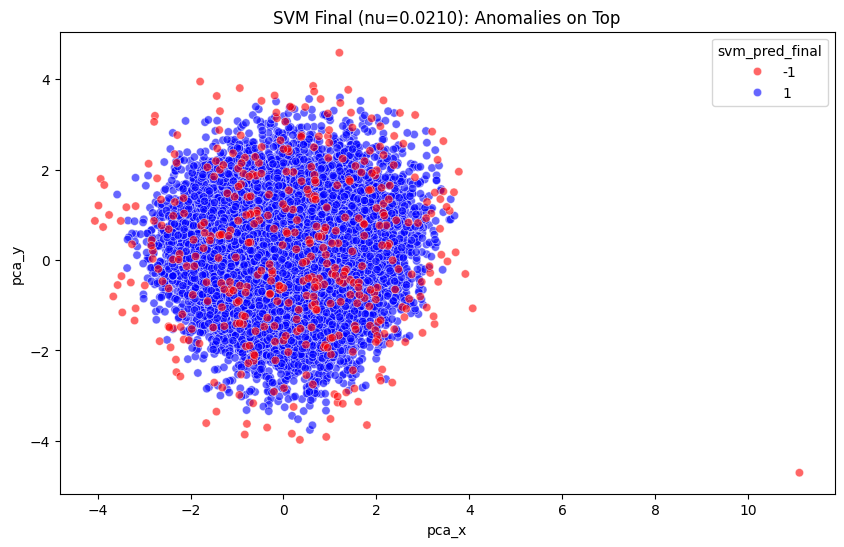

In [73]:
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Model & Predict
final_nu = 411 / 19535
svm_final = OneClassSVM(nu=final_nu, kernel='rbf', gamma='scale')
df['svm_pred_final'] = svm_final.fit_predict(df_scaled)

# 2. PCA & Locking Coordinates - did this to sort so that the anomalies will be 'paint' on top of the others.
pca = PCA(n_components=2)
coords = pca.fit_transform(df_scaled)
df['pca_x'] = coords[:, 0]
df['pca_y'] = coords[:, 1]

# 3. Sort & Plot (Anomalies last = on top)
df_sorted = df.sort_values(by='svm_pred_final', ascending=False)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sorted, x='pca_x', y='pca_y', hue='svm_pred_final',
                palette={1:'blue', -1:'red'}, alpha=0.6)
plt.title(f"SVM Final (nu={final_nu:.4f}): Anomalies on Top")
plt.show()

We can see the outliers in red here and somewhat scattered around the outside of the figure. The extreme outliers are also significantly impacting the location of the swarm as seen just outside of 10 on the x axis

# Project guidance
6. Perform anomaly detection with ML models:
  - Using Isolation Forest,
    - identify possible anomalies
    - visualise the output in 2D after performing PCA and ensure the outliers are in a different colour
    - apply different combinations of parameter settings to improve the model's outlier predictions to the expected 1-5%
    - record your insights about the use of this method.


In [68]:
from sklearn.ensemble import IsolationForest

# Targets: 1%, Your IQR Exact Match (~2.1%), 5%
targets = [0.01, 411/19535, 0.05]

print("--- ISOLATION FOREST (Unscaled Data) ---")

for c in targets:
    # Notice we fit on 'df', not 'df_scaled'
    iso = IsolationForest(contamination=c, random_state=42)
    preds = iso.fit_predict(df)

    n_bad = list(preds).count(-1)
    print(f"Contamination: {c:.4f} | Anomalies: {n_bad} ({n_bad/len(df)*100:.2f}%)")

--- ISOLATION FOREST (Unscaled Data) ---
Contamination: 0.0100 | Anomalies: 196 (1.00%)
Contamination: 0.0210 | Anomalies: 411 (2.10%)
Contamination: 0.0500 | Anomalies: 977 (5.00%)


The isolation forrest behaves well and is precise in getting the number of anomalies we were using from iqr. Now, let's visualise it

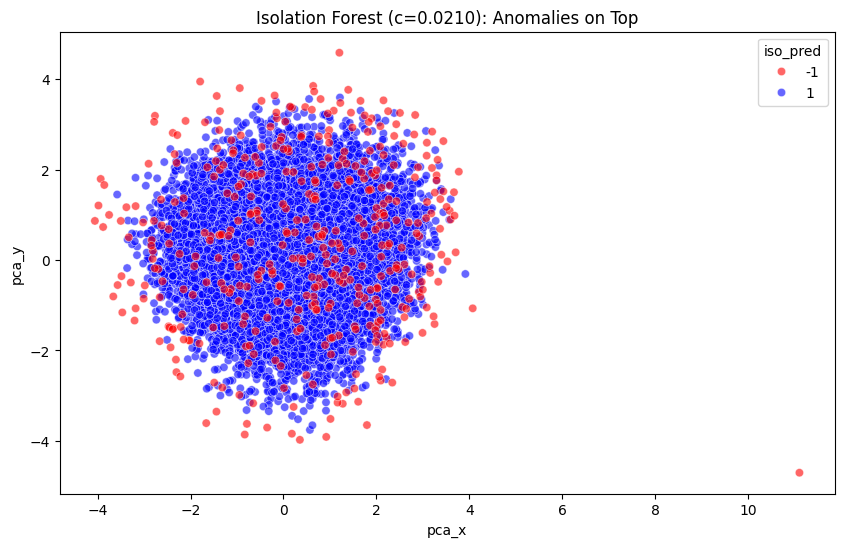

In [74]:
from sklearn.ensemble import IsolationForest

# 1. Model & Predict (Using Unscaled DF as requested)
iso_final = IsolationForest(contamination=final_nu, random_state=42)
df['iso_pred'] = iso_final.fit_predict(df)

# 2. Sort & Plot
df_sorted_iso = df.sort_values(by='iso_pred', ascending=False)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sorted_iso, x='pca_x', y='pca_y', hue='iso_pred',
                palette={1:'blue', -1:'red'}, alpha=0.6)
plt.title(f"Isolation Forest (c={final_nu:.4f}): Anomalies on Top")
plt.show()

It's hard to say what the difference is for the ML so let's make a table that shows the overlap between these two. I'll use the scaled data as SVM needs that and iso doesn't mind scaled or unscaled data.



--- Model Agreement Table ---
                Count  Percent
category                      
Normal          18955    97.03
Overlap (Both)    246     1.26
SVM Only          169     0.87
Iso Only          165     0.84
-----------------------------



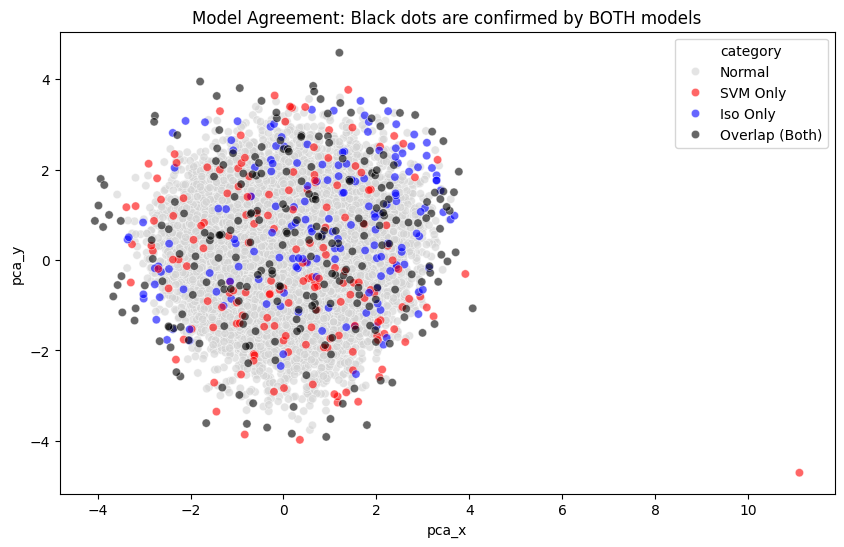

In [79]:
# 1. Run Both Models
ratio = 411 / 19535
svm_preds = OneClassSVM(nu=ratio, kernel='rbf', gamma='scale').fit_predict(df_scaled)
iso_preds = IsolationForest(contamination=ratio, random_state=42).fit_predict(df_scaled)

# 2. Categorize Overlaps
conditions = [
    (svm_preds == -1) & (iso_preds == -1),
    (svm_preds == -1),
    (iso_preds == -1)
]
choices = ['Overlap (Both)', 'SVM Only', 'Iso Only']
df['category'] = np.select(conditions, choices, default='Normal')

# 3. PRINT THE TABLE ----------------------------------
print("\n--- Model Agreement Table ---")
counts = df['category'].value_counts()
pcts = (df['category'].value_counts(normalize=True) * 100).round(2)
summary = pd.DataFrame({'Count': counts, 'Percent': pcts})
print(summary)
print("-----------------------------\n")
# -----------------------------------------------------

# 4. Plot
pca = PCA(n_components=2)
coords = pca.fit_transform(df_scaled)
df['pca_x'], df['pca_y'] = coords[:, 0], coords[:, 1]
df.sort_values(by='category', key=lambda x: x.map({'Normal':0, 'SVM Only':1, 'Iso Only':1, 'Overlap (Both)':2}), inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='category',
                palette={'Normal': 'lightgray', 'Overlap (Both)': 'black', 'SVM Only': 'red', 'Iso Only': 'blue'},
                alpha=0.6)
plt.title("Model Agreement: Black dots are confirmed by BOTH models")
plt.show()

This is interesting it does seem like Iso tends to catch the ones further away from the swarm. And, while both hit the amount of anomalies we found,

# Project guidance
7. Document your approach and major inferences from the data analysis and describe which method (and parameters) provided the best results and why.


I don't like what that one variable did I think it's coolant pressure or something the one that had a lot of anomalies I feel like that's dominating a lot of what the IQR has did so basically the second most important IQR gets the most almost air time in terms of what it gets to say is an anomaly or not so

# Project guidance
8. When you’ve completed the activity:
  - Download your completed Notebook as an IPYNB (Jupyter Notebook). Save the file as follows: LastName_FirstName_CAM_C101_W5_Mini-project.ipynb
  - Prepare a detailed report (between 800-1000 words) that includes:
    - an overview of the problem that is being addressed in this project
    - an overview of your approach, with a clear visualisation of your anomaly detection approach
    - key figures and tables of the main results
    - interpretation of the anomaly detection results
    - an evaluation of the effectiveness of 2D PCA plots in highlighting outliers
    - recommendations based on gathered evidence.
  - Save the document as a PDF named according to the following convention: LastName_FirstName_CAM_C101_W5_Mini-project.pdf.